# Esercitazione 3  
## Basi ortonormali: Base standard e DCT (Parte seconda)

### Sommario

In questa esercitazione vengono analizzate diverse modalità di rappresentazione delle immagini attraverso basi ortonormali, con particolare riferimento alla base canonica e alla base DCT bidimensionale.

Partendo dalla lettura e visualizzazione di un’immagine in scala di grigi di dimensione 64×64 pixel (vedere esercitazione precedente), si esplora il processo di trasmissione dei coefficienti di rappresentazione rispetto alla base canonica, simulando perdite di dati e osservando l’effetto sull’immagine ricostruita e sull’errore relativo.

Successivamente, viene introdotta la base DCT, visualizzandone alcuni elementi caratteristici e confrontando le prestazioni di approssimazione dell’immagine utilizzando solo una porzione dei coefficienti trasmessi. Infine, si analizza la distribuzione dei coefficienti DCT più significativi e si valuta la qualità della ricostruzione con un numero limitato di coefficienti, evidenziando i vantaggi in termini di compressione e accuratezza rispetto alla base canonica.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

#### Esercizio 1  

In questo esercizio consideriamo due tipi di base per la rappresentazione di immagini: la base canonica e la base DCT bidimensionale.

**(a)** Leggere l’immagine `cameraman.jpg` usando il comando  
```python
np.array(plt.imread('cameraman.jpg'), dtype='float64')
```  
utilizzando le librerie `numpy` e `matplotlib`.

**(b)** Visualizzare l’immagine usando il comando `imshow` della libreria `matplotlib`.

**(c)** Verificare che l’immagine caricata è una immagine in scala di grigi di dimensione 64×64 pixel. (Controllare che ciascun pixel abbia un valore intero compreso tra 0 e 255.)

**(d)** La base canonica di questo spazio è formata dall’insieme di matrici dove un solo elemento è uguale a uno e tutti gli altri sono zero.  
Supponiamo di voler trasmettere questa immagine. L’immagine viene rappresentata utilizzando la base canonica e vengono trasmessi i coefficienti $ c_i = \langle I, e_i \rangle $, con $1 \le i \le 4096$.  
Supponiamo che ci sia un errore nella trasmissione e solo una parte dei coefficienti venga trasmessa. L’immagine ricevuta è un’approssimazione dell’originale con i coefficienti mancanti posti a zero.  
Visualizzare l’immagine ricevuta e calcolare l’errore relativo di trasmissione.

**(e)** Considerare ora una base diversa da quella canonica. Leggere il file `DCT.mat` usando  
```python
sio.loadmat('DCT.mat')['B']
```  
dalla libreria `scipy.io`. Il file contiene una matrice tridimensionale `B` contenente la base della DCT.  
Per ottenere il $ i $-esimo elemento della base usare:  
```python
bi = np.reshape(B[i, :, :], [64, 64])
```  
Visualizzare con `imshow` gli elementi 0, 1, 2, 3, 64, 65, 66, 67.

**(f)** Calcolare l’errore di approssimazione prendendo solo la **prima metà dei coefficienti** dell’immagine rispetto alla **base canonica**.  
Ripetere il calcolo con la **base DCT**, usando  
$$
I_{rec} = \sum_{i=1}^{4096} c_i b_i
$$  
e confrontare gli errori. Quale base fornisce una migliore approssimazione?

**(g)** Visualizzare in ordine decrescente il **valore assoluto** dei primi 2048 coefficienti dell’immagine rispetto alla base DCT.  
Approssimare l’immagine usando i primi $ k = 2048 $ coefficienti **più significativi**, visualizzare l’approssimazione e calcolare l’errore relativo.

✅ Immagine letta: shape = (64, 64), dtype = float64


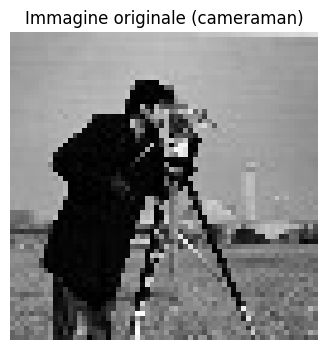

📏 Dimensioni 64×64? OK
🔢 Valori interi? OK
🔢 Valori in [0,255]? OK


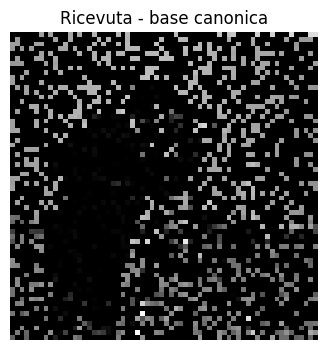

❌ Errore relativo (base canonica): 8.59e-01


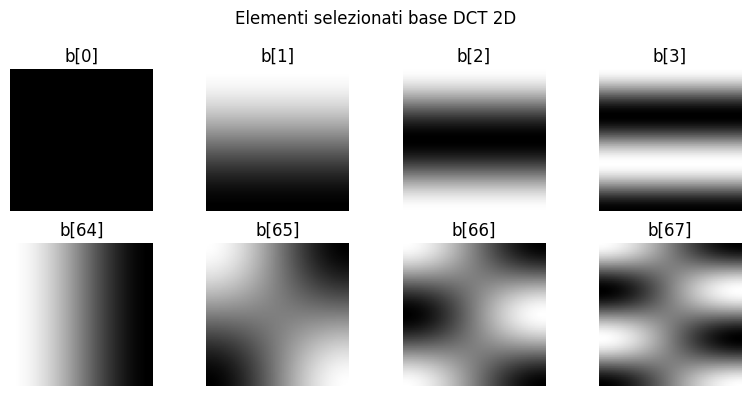

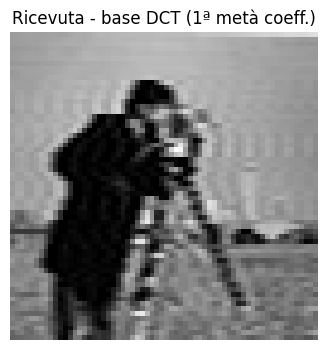

❌ Errore relativo (base DCT): 1.38e-01
👉 Base migliore? DCT


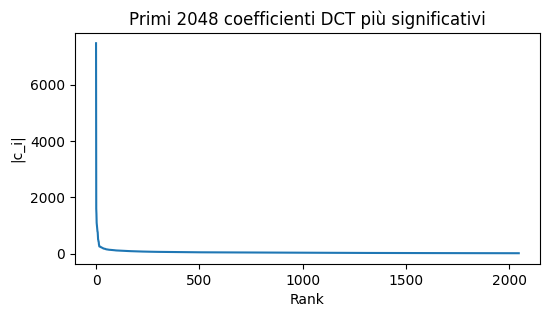

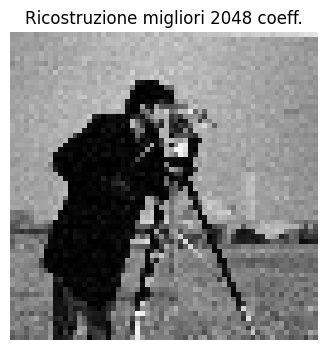

❌ Errore relativo (migliori 2048 coeff.): 5.52e-02


In [2]:
# --------------------------
# (a) Lettura immagine
# --------------------------
I = np.array(plt.imread('cameraman.jpg'), dtype='float64')
print(f"✅ Immagine letta: shape = {I.shape}, dtype = {I.dtype}")

# Se RGB, prendiamo il primo canale
if I.ndim == 3:
    I = I[:, :, 0]
    print("ℹ️ Immagine RGB: selezionato il canale 0 per scala di grigi")

# --------------------------
# (b) Visualizzazione
# --------------------------
plt.figure(figsize=(4, 4))
plt.imshow(I, cmap='gray', vmin=0, vmax=255)
plt.title("Immagine originale (cameraman)")
plt.axis('off')
plt.show()

# --------------------------
# (c) Verifica scala di grigi 64×64 e valori interi [0,255]
# --------------------------
h, w = I.shape
is_int = np.all(np.floor(I) == I)
in_range = np.all((I >= 0) & (I <= 255))

print(f"📏 Dimensioni 64×64? {'OK' if (h, w)==(64,64) else 'NO'}")
print(f"🔢 Valori interi? {'OK' if is_int else 'NO'}")
print(f"🔢 Valori in [0,255]? {'OK' if in_range else 'NO'}")

# --------------------------
# (d) Base canonica: trasmissione con cancellazione coefficiente
# --------------------------
# Costruiamo i coefficienti ci = <I, ei>, ma in pratica
# se EI è la base canonica, ci = I.flatten()[i]
coeff_can = I.flatten().copy()
num = coeff_can.size
num_erasures = num // 4  # es. primo 25% trasmessi
idx = np.random.permutation(num)
to_zero = idx[num_erasures:]
coeff_rec_can = coeff_can.copy()
coeff_rec_can[to_zero] = 0

# Ricostruisco l'immagine
I_rec_can = coeff_rec_can.reshape(I.shape)
plt.figure(figsize=(4, 4))
plt.imshow(I_rec_can, cmap='gray', vmin=0, vmax=255)
plt.title("Ricevuta - base canonica")
plt.axis('off')
plt.show()

# Errore relativo
err_can = np.linalg.norm(I - I_rec_can) / np.linalg.norm(I)
print(f"❌ Errore relativo (base canonica): {err_can:.2e}")

# --------------------------
# (e) Base DCT 2D: caricamento e visualizzazione elementi
# --------------------------
B = sio.loadmat('DCT.mat')['B']  # B.shape = (4096,64,64)
indices = [0, 1, 2, 3, 64, 65, 66, 67]
plt.figure(figsize=(8, 4))
for i, idx in enumerate(indices):
    bi = B[idx, :, :].reshape(64, 64)
    ax = plt.subplot(2, 4, i+1)
    ax.imshow(bi, cmap='gray')
    ax.set_title(f"b[{idx}]")
    ax.axis('off')
plt.suptitle("Elementi selezionati base DCT 2D")
plt.tight_layout()
plt.show()

# --------------------------
# (f) Approssimazione con prima metà dei coefficienti
# --------------------------
# Calcolo tutti i coefficienti ci = <I, bi>
coef_dct = np.array([np.sum(I * B[i]) for i in range(B.shape[0])])

# Canonica: già fatto sopra come coeff_can
# DCT: tronco la seconda metà
coef_trunc = coef_dct.copy()
coef_trunc[len(coef_trunc)//2:] = 0

# Ricostruzione: I_rec_dct = sum ci * bi
I_rec_dct = np.tensordot(coef_trunc, B, axes=(0,0))  # forma (64,64)
plt.figure(figsize=(4,4))
plt.imshow(I_rec_dct, cmap='gray', vmin=0, vmax=255)
plt.title("Ricevuta - base DCT (1ª metà coeff.)")
plt.axis('off')
plt.show()

err_dct = np.linalg.norm(I - I_rec_dct) / np.linalg.norm(I)
print(f"❌ Errore relativo (base DCT): {err_dct:.2e}")
print(f"👉 Base migliore? {'DCT' if err_dct < err_can else 'canonica'}")

# --------------------------
# (g) Coefficienti DCT ordinati e approssimazione migliori k
# --------------------------
# Ordino per valore assoluto discendente
order = np.argsort(np.abs(coef_dct))[::-1]
k = 2048
best_indices = order[:k]

# Grafico dei primi 2048 coefficienti
plt.figure(figsize=(6, 3))
plt.plot(np.abs(coef_dct[best_indices]))
plt.title("Primi 2048 coefficienti DCT più significativi")
plt.xlabel("Rank")
plt.ylabel("|c_i|")
plt.show()

# Approssimazione con i migliori k
coef_bestk = np.zeros_like(coef_dct)
coef_bestk[best_indices] = coef_dct[best_indices]
I_rec_bestk = np.tensordot(coef_bestk, B, axes=(0,0))

plt.figure(figsize=(4,4))
plt.imshow(I_rec_bestk, cmap='gray', vmin=0, vmax=255)
plt.title(f"Ricostruzione migliori {k} coeff.")
plt.axis('off')
plt.show()

err_bestk = np.linalg.norm(I - I_rec_bestk) / np.linalg.norm(I)
print(f"❌ Errore relativo (migliori {k} coeff.): {err_bestk:.2e}")
